## Introduction

### Use Kaggle data to generate a cohort retention chart (heatmap).

Final result looks like this: 

<div>
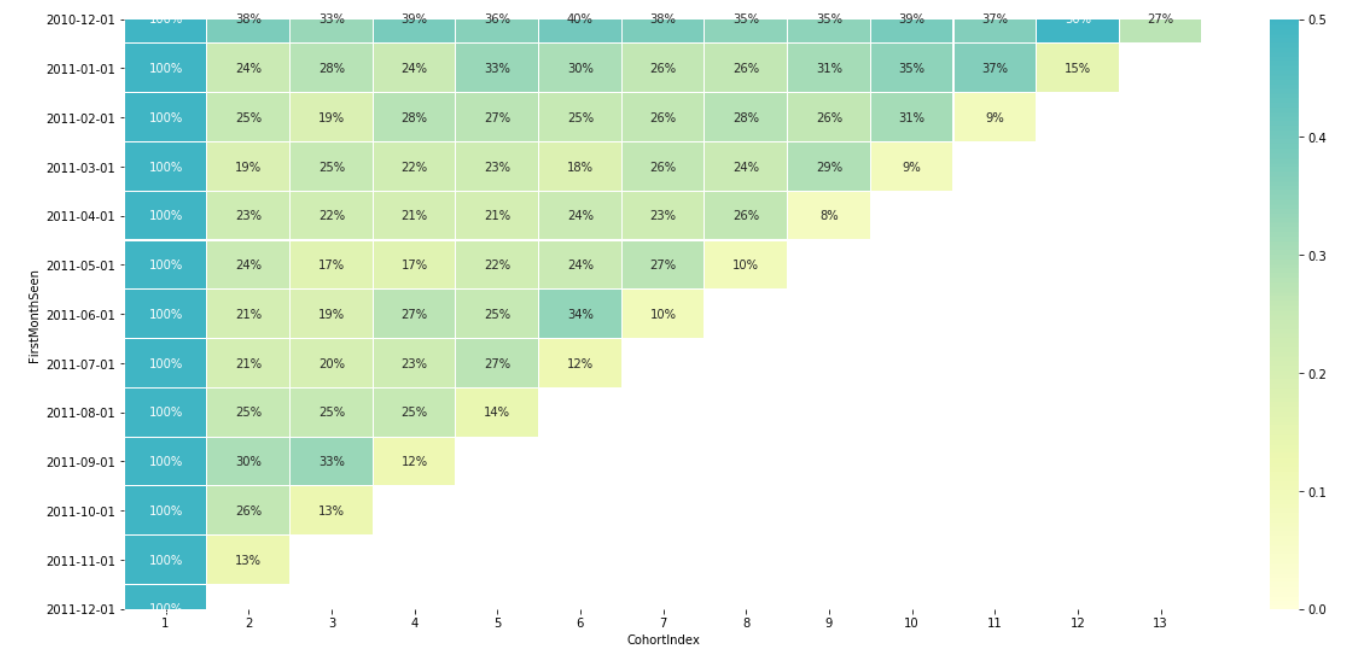
</div>

####  [dataset source](https://www.kaggle.com/jihyeseo/online-retail-data-set-from-uci-ml-repo), from kaggle

In [1]:
# import libraries
import pandas as pd
import numpy as np
import datetime as dt

# import data
customers = pd.read_excel('Online Retail 2.xlsx')

In [2]:
customers.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# understand all the columns
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## data cleaning: 
1. remove null data

In [4]:
customers.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
customers.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# remove null customerID
customers = customers.dropna(subset=['CustomerID'])

In [7]:
# confirm all null value removed
customers.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

2. remove duplicate data


In [8]:
customers = customers.drop_duplicates()

In [9]:
# confirm all duplicate value removed
customers.duplicated().sum()

0

In [10]:
customers.shape
customers.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


### add column: `InvoiceMonth` & `FirstSeenMonth`

In [27]:
# add invoicemoth
customers['InvoiceDate'].astype

def get_first_month(x): return dt.datetime(x.year,x.month,1)
customers["InvoiceMonth"] = customers["InvoiceDate"].apply(get_first_month)
customers.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,FirstMonthSeen
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


In [30]:
# add firstseenmonth

grouping = customers.groupby('CustomerID')
grouping.head()
customers["FirstMonthSeen"] = grouping["InvoiceMonth"].transform("min")
#customers["FirstMonthSeen"].describe()
customers.groupby("InvoiceDate").head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,FirstMonthSeen
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
541894,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,2011-12-01,2011-08-01
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,2011-12-01,2011-08-01
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,2011-12-01,2011-08-01
541897,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680.0,France,2011-12-01,2011-08-01


## after cleanup, here is an overview of what our data look like: 

In [88]:
customers.groupby("InvoiceDate").head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,FirstMonthSeen
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
541894,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,2011-12-01,2011-08-01
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,2011-12-01,2011-08-01
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,2011-12-01,2011-08-01
541897,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680.0,France,2011-12-01,2011-08-01


## retention analysis
### question 1: for people who engaged at the beginning of the year 2011, draw a retention chart. (2011-1-1 to 2011-12-1)


### question 2: generate a cohort retention analysis chart

groupby criteria: 1. cohort_group(month) 2.cohort_index

cohort_index = `InvoiceDate` - `FirstMonthSeen` = yeardiff *12 + monthdiff*1 + 1
get all the year, and month

In [151]:
# calculate cohort_index

def get_year_month(columnName):
    year = customers[columnName].dt.year
    month = customers[columnName].dt.month
    return year,month
invoice_year, invoice_month = get_year_month("InvoiceDate")
cohort_year, cohort_month = get_year_month("FirstMonthSeen")

yeardiff = invoice_year - cohort_year
monthdiff = invoice_month - cohort_month

cohort_index = yeardiff*12 + monthdiff + 1
customers["CohortIndex"] = cohort_index
customers["CohortIndex"].describe()

count    401604.000000
mean          5.187227
std           3.856358
min           1.000000
25%           1.000000
50%           4.000000
75%           8.000000
max          13.000000
Name: CohortIndex, dtype: float64

In [156]:
# group database by cohortmonth, cohortindex
cohort_data = customers.groupby(["FirstMonthSeen","CohortIndex"])["CustomerID"].nunique()
cohort_data

FirstMonthSeen  CohortIndex
2010-12-01      1              948
                2              362
                3              317
                4              367
                5              341
                              ... 
2011-10-01      2               93
                3               46
2011-11-01      1              321
                2               43
2011-12-01      1               41
Name: CustomerID, Length: 91, dtype: int64

In [157]:
# reformatting the cohort_data into 2 axis cohort retention chart

cohort_table = cohort_data.to_frame()
cohort_table.reset_index()

,FirstMonthSeen,CohortIndex,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


## cohort analysis 1.0 

In [163]:
retention_table = cohort_table.pivot_table(index="FirstMonthSeen",columns="CohortIndex",values="CustomerID")
retention_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
FirstMonthSeen,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## cohort analysis 2.0 (add percentage)

In [188]:
# percentage = value/cohortTotal|

# get cohort totoals
cohortTotal = retention_table.iloc[:,0]
cohortTotal
# get percentage value
retention_table2 = retention_table.divide(cohortTotal, axis="index")
# get % value, rounded
retention_table2 = retention_table2.round(2)
retention_table2

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
FirstMonthSeen,,,,,,,,,,,,,
2010-12-01,1.0,0.38,0.33,0.39,0.36,0.40,0.38,0.35,0.35,0.39,0.37,0.50,0.27
2011-01-01,1.0,0.24,0.28,0.24,0.33,0.30,0.26,0.26,0.31,0.35,0.37,0.15,NaN
2011-02-01,1.0,0.25,0.19,0.28,0.27,0.25,0.26,0.28,0.26,0.31,0.09,NaN,NaN
2011-03-01,1.0,0.19,0.25,0.22,0.23,0.18,0.26,0.24,0.29,0.09,NaN,NaN,NaN
2011-04-01,1.0,0.23,0.22,0.21,0.21,0.24,0.23,0.26,0.08,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.24,0.17,0.17,0.22,0.24,0.27,0.10,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.21,0.19,0.27,0.25,0.34,0.10,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.21,0.20,0.23,0.27,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.25,0.25,0.25,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualization

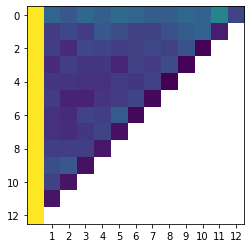

In [189]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
im = ax.imshow(retention_table2)

ax.set_xticks(np.arange(1,13))


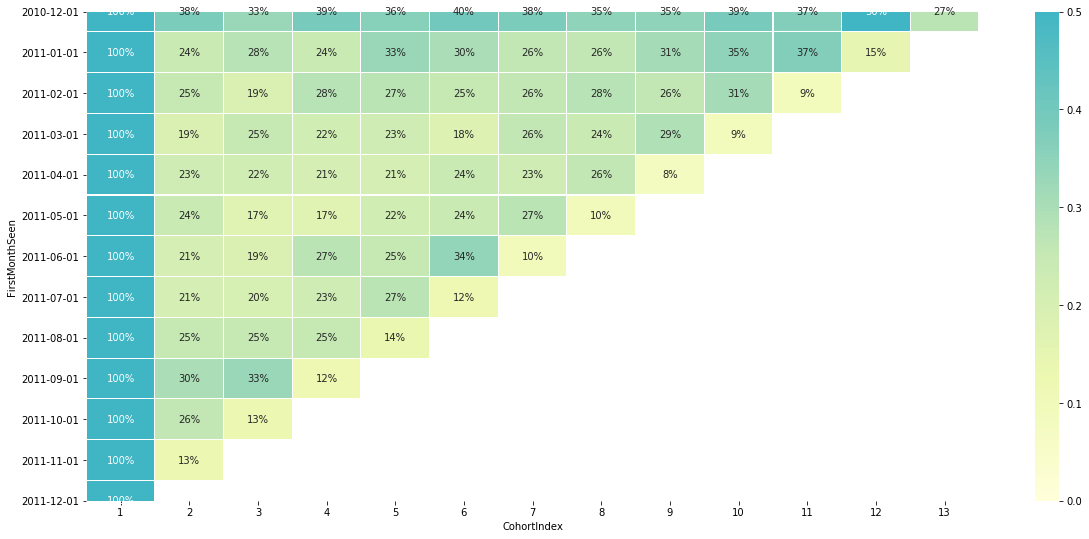

In [226]:
# seaborn heapmap function:
import seaborn as sns

plt.figure(figsize=(20,9))

# set ylabels
y_axis_labels = ['2010-12-01','2011-01-01','2011-02-01','2011-03-01','2011-04-01','2011-05-01','2011-06-01','2011-07-01','2011-08-01','2011-09-01','2011-10-01','2011-11-01','2011-12-01']
# generate heatmap
sns.heatmap(retention_table2,yticklabels= y_axis_labels, annot=True, linewidth=.1, fmt=".000%",cmap="YlGnBu",center=0.5,vmin=0,vmax=0.5)

plt.show()
 

##  And we are done!